# Instructions

### This notebook was designed to do statistical analysis for data from Spaak experiments.

## Import packages and read the dataset

In [213]:
import pandas as pd
import numpy as np

# Enable interactive Matplotlib plots in the notebook
# %matplotlib qt5

import matplotlib.pyplot as plt
from matplotlib import cm
import os
# import astropy.convolution as krn
import scipy.stats as stats
from scipy.stats import ttest_ind, ttest_rel
import sys
import matplotlib.pyplot as plt
from matplotlib.widgets import Button
import seaborn as sns


# Read the dataset
path = 'D:/Dropbox/Appliedwork/CognitiveSolutions/Projects/DeepEye/TechnicalReports/TechnicalReport1/Test_Spaak/data/approved/analysis'
# path = 'C:/Users/artem/Dropbox/Appliedwork/CognitiveSolutions/Projects/DeepEye/TechnicalReports/TechnicalReport1/Test_Spaak/data/approved/analysis'
path_to_dataset = os.path.join(path, 'allSubjects_Spaak.csv')
df = pd.read_csv(path_to_dataset)



### Filter data

In [214]:
# create a unique pp-id for each participant
df['pp_id'] = df['fName'].str.split('.').str[0].str.rsplit('_', 1).str[0]

# filter out excluded participants if needed
df = df[~df['pp_id'].isin(['2024_06_14_09_03_43', '2024_06_14_11_03_20'])]

# Create one code for Model Size, independent of the dress type
df['AOI_stim_adj'] = df.apply(lambda row: row['condition'] + '_' + row['AOI_stim'] if row['AOI_stim'] in ['None', 'other'] else row['AOI_stim'], axis=1)



C:\Users\Artem\AppData\Local\Temp\ipykernel_21672\2697205492.py:2: FutureWarning: In a future version of pandas all arguments of StringMethods.rsplit except for the argument 'pat' will be keyword-only.
  df['pp_id'] = df['fName'].str.split('.').str[0].str.rsplit('_', 1).str[0]


### Fixation Durations (Proportion of fixation duration on on each stimulus)

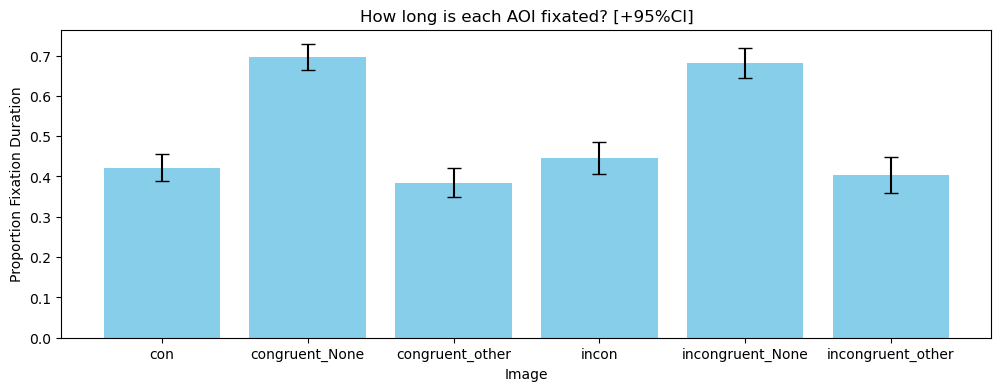

T-statistic: -1.1219359492397178, P-value: 0.27078957750114946
0.4219643232612892 0.444856104490414


In [215]:
# group data per AOI
fixDur = df.groupby(['pp_id', 'trialNr', 'AOI_stim_adj']).FixDur.sum()
fixDur_df = fixDur.reset_index()

# Calculate 'FixDurProp'
fixDur_df['FixDurProp'] = fixDur_df.groupby(['pp_id', 'trialNr'])['FixDur'].transform(lambda x: x / x.sum())

a = fixDur_df.groupby(['pp_id', 'AOI_stim_adj']).FixDurProp.mean().reset_index()

# Calculate mean and standard error of the mean (SEM)
stats = a.groupby(['AOI_stim_adj']).agg(
    mean=('FixDurProp', 'mean'),
    ci_95=('FixDurProp', lambda x: 1.96 * np.std(x, ddof=1) / np.sqrt(len(x)))
)

# Extracting values for plotting
categories = stats.index.tolist()
means = stats['mean'].tolist()
errors = stats['ci_95'].tolist()

# Creating the bar graph with error bars
plt.figure(figsize=(12, 4))
plt.bar(categories, means, color='skyblue', yerr=errors, capsize=5)
# plt.ylim([800, 1800])

# Adding titles and labels
plt.title('How long is each AOI fixated? [+95%CI]')
plt.xlabel('Image')
plt.ylabel('Proportion Fixation Duration')

# Show the plot
plt.show()

# Some stats
con = a[a.AOI_stim_adj == 'con'].FixDurProp
incon = a[a.AOI_stim_adj == 'incon'].FixDurProp

t_stat, p_value = ttest_rel(con, incon)
print(f"T-statistic: {t_stat}, P-value: {p_value}")
print(con.mean(), incon.mean())


### Fixation Duration

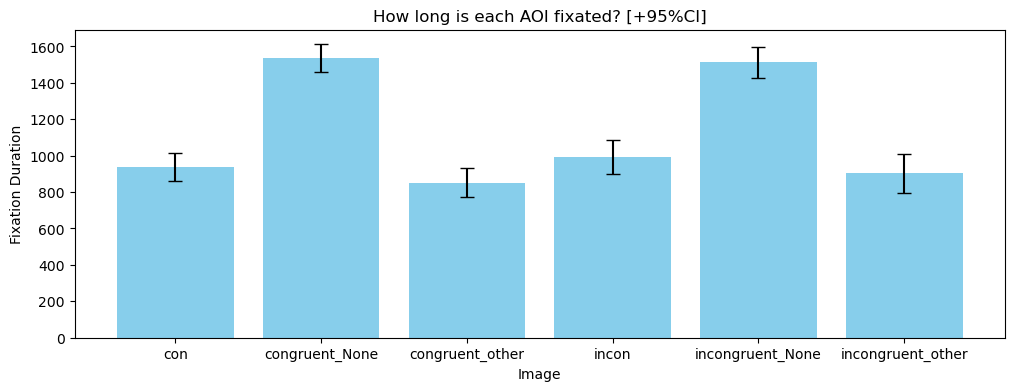

T-statistic: -1.1779956384564312, P-value: 0.2480586949119965
938.4254567044902 992.8706715743833


In [216]:
a = fixDur_df.groupby(['pp_id', 'trialNr', 'AOI_stim_adj']).FixDur.sum().reset_index() # sum over each AOI for each trial 
a = a.groupby(['pp_id', 'AOI_stim_adj']).FixDur.mean().reset_index() # average across trials for each participant for each AOI

# Calculate mean and standard error of the mean (SEM)
stats = a.groupby(['AOI_stim_adj']).agg(
    mean=('FixDur', 'mean'),
    ci_95=('FixDur', lambda x: 1.96 * np.std(x, ddof=1) / np.sqrt(len(x)))
)

# Extracting values for plotting
categories = stats.index.tolist()
means = stats['mean'].tolist()
errors = stats['ci_95'].tolist()

# Creating the bar graph with error bars
plt.figure(figsize=(12, 4))
plt.bar(categories, means, color='skyblue', yerr=errors, capsize=5)
# plt.ylim([800, 1800])

# Adding titles and labels
plt.title('How long is each AOI fixated? [+95%CI]')
plt.xlabel('Image')
plt.ylabel('Fixation Duration')

# Show the plot
plt.show()



# Some stats
con = a[a.AOI_stim_adj == 'con'].FixDur
incon = a[a.AOI_stim_adj == 'incon'].FixDur

t_stat, p_value = ttest_rel(con, incon)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

print(con.mean(), incon.mean())



### Fixation Latency

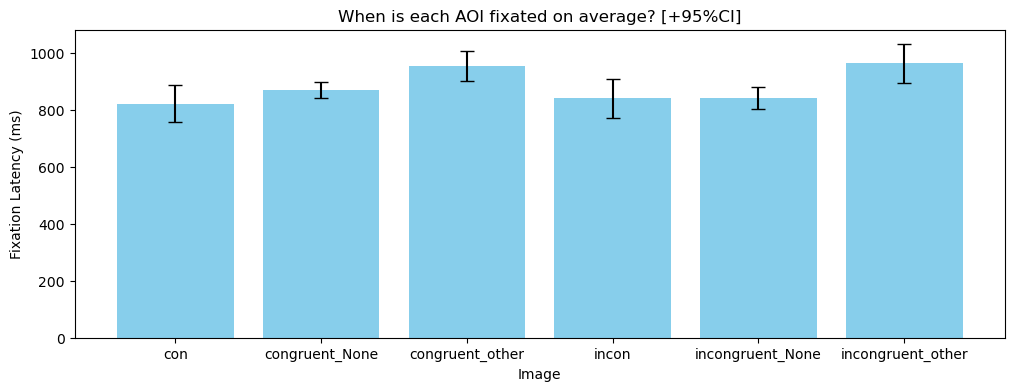

T-statistic: -0.3549062658882322, P-value: 0.7251427769834329
822.6123583496247 841.572936392099
                         mean      ci_95
AOI_stim_adj                            
con                822.612358  66.003233
congruent_None     870.115191  28.833259
congruent_other    954.865848  51.536743
incon              841.572936  67.986125
incongruent_None   842.630560  39.065492
incongruent_other  964.134173  67.463488


In [217]:
# group data
fixLatency = df.groupby(['pp_id', 'trialNr','AOI_stim_adj']).FixLatency.mean() # mean over each AOI for each trial for each pp
fixLatency_df = fixLatency.reset_index()


a = fixLatency_df.groupby(['pp_id', 'AOI_stim_adj']).FixLatency.mean().reset_index() # average across trials for each participant for each AOI

# Calculate mean and standard error of the mean (SEM)
stats = a.groupby('AOI_stim_adj').agg(
    mean=('FixLatency', 'mean'),
    ci_95=('FixLatency', lambda x: 1.96 * np.std(x, ddof=1) / np.sqrt(len(x)))
)

# Extracting values for plotting
categories = stats.index.tolist()
means = stats['mean'].tolist()
errors = stats['ci_95'].tolist()


# Creating the bar graph with error bars
plt.figure(figsize=(12, 4))
plt.bar(categories, means, color='skyblue', yerr=errors, capsize=5)

# Adding titles and labels
plt.title('When is each AOI fixated on average? [+95%CI]')
plt.xlabel('Image')
plt.ylabel('Fixation Latency (ms)')

# Show the plot
plt.show()

# Some stats
con = a[a.AOI_stim_adj == 'con'].FixLatency
incon = a[a.AOI_stim_adj == 'incon'].FixLatency

t_stat, p_value = ttest_rel(con, incon)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

print(con.mean(), incon.mean())
print(stats)

### Plot Distribution of Fixation Latencies

count of datapoints in incongruent_None: 832
count of datapoints in incongruent_other: 364
count of datapoints in incon: 465
count of datapoints in congruent_None: 845
count of datapoints in congruent_other: 403
count of datapoints in con: 443


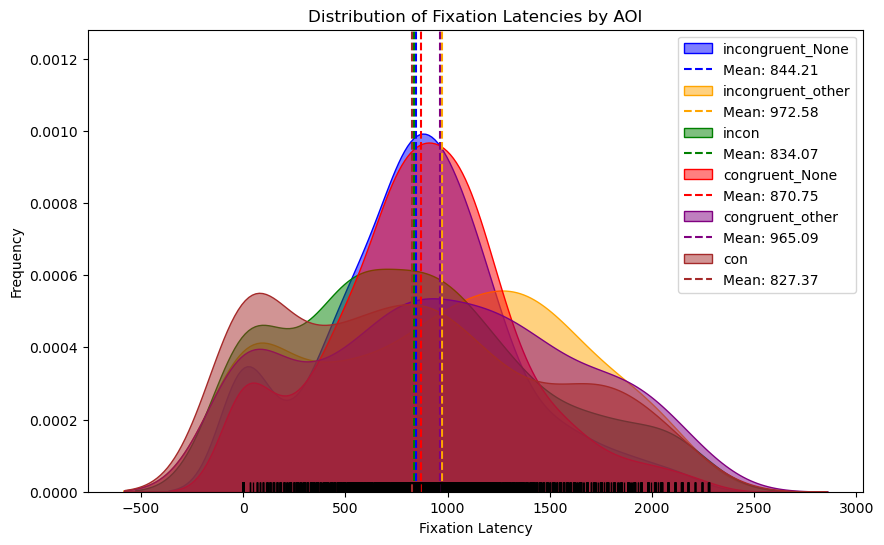

In [218]:
# Plot distributions of latencies

# Set up the plot dimensions and style
plt.figure(figsize=(10, 6))

# Get unique groups
groups = fixLatency_df['AOI_stim_adj'].unique()

colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']

# Plot histogram for each group
for i, group in enumerate(groups):
    color = colors[i]
    # Extract the data for the group
    group_data = fixLatency_df[fixLatency_df['AOI_stim_adj'] == group]['FixLatency']
    print(f'count of datapoints in {group}: {group_data.count()}')
    group_data = group_data[group_data < 10000]
    
    # Plot the kde
    sns.kdeplot(data=group_data, fill=True, color=color, alpha=0.5, label=group)
    
    # Plot individual points
    sns.rugplot(data=group_data, height=0.02, color="k")
    
    # Plot the mean vertical line
    mean_data = group_data.mean()
    plt.axvline(mean_data, color=color, linestyle='--', linewidth=1.5, label=f'Mean: {mean_data:.2f}')

# Add legend, title, and labels
plt.legend()
plt.title('Distribution of Fixation Latencies by AOI')
plt.xlabel('Fixation Latency')
plt.ylabel('Frequency')

plt.show()



### Fixation Order (average order of fixations for each model)


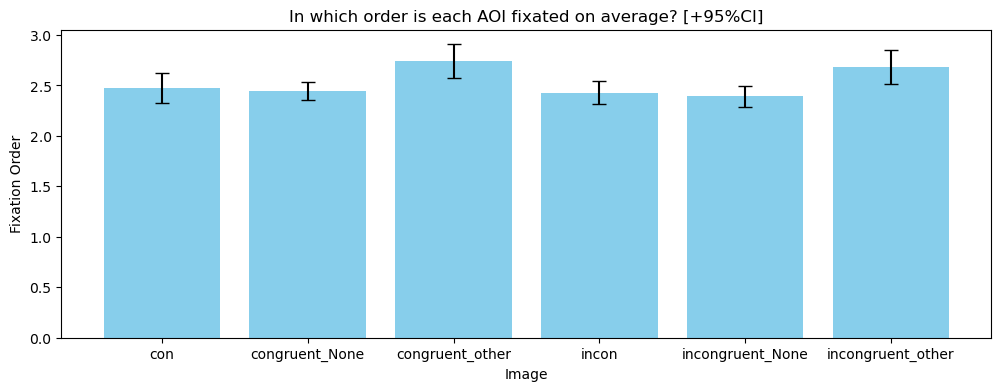

T-statistic: 0.6045805406800738, P-value: 0.5500034005518883
2.4744397970633747 2.4270958600380355


In [219]:
# group data
fixOrder = df.groupby(['pp_id', 'trialNr', 'AOI_stim_adj']).FixationOrder.mean()
fixOrder_df = fixOrder.reset_index()

a = fixOrder_df.groupby(['pp_id', 'AOI_stim_adj']).FixationOrder.mean().reset_index() # average across trials for each participant for each AOI

# Calculate mean and standard error of the mean (SEM)
stats = a.groupby('AOI_stim_adj').agg(
    mean=('FixationOrder', 'mean'),
    ci_95=('FixationOrder', lambda x: 1.96 * np.std(x, ddof=1) / np.sqrt(len(x)))
)

# Extracting values for plotting
categories = stats.index.tolist()
means = stats['mean'].tolist()
errors = stats['ci_95'].tolist()



# Creating the bar graph with error bars
plt.figure(figsize=(12, 4))
plt.bar(categories, means, color='skyblue', yerr=errors, capsize=5)
# plt.ylim([800, 1800])

# Adding titles and labels
plt.title('In which order is each AOI fixated on average? [+95%CI]')
plt.xlabel('Image')
plt.ylabel('Fixation Order')

# Show the plot
plt.show()

# Some stats
con = a[a.AOI_stim_adj == 'con'].FixationOrder
incon = a[a.AOI_stim_adj == 'incon'].FixationOrder

t_stat, p_value = ttest_rel(con, incon)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

print(con.mean(), incon.mean())

### Fixation Count

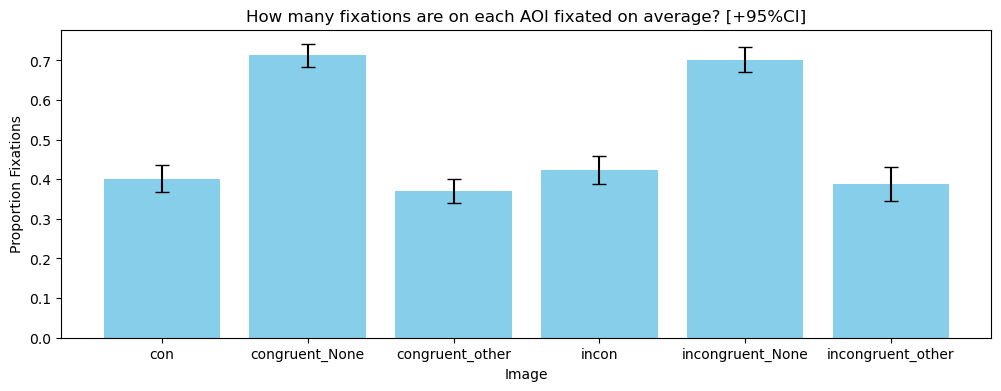

T-statistic FixProp Con vs Incon: -1.5192241449554997, P-value: 0.13917591171450241
T-statistic FixProp Con_other vs Incon_other: -0.843316703389527, P-value: 0.40572540436976856
T-statistic FixProp Con vs Con_other: 1.6957034425873545, P-value: 0.10029789925934432
T-statistic FixProp Incon vs Incon_other: 2.316494684393371, P-value: 0.02754573052808295
                       mean     ci_95
AOI_stim_adj                         
con                0.401323  0.034282
congruent_None     0.712810  0.028212
congruent_other    0.370745  0.030690
incon              0.423381  0.036121
incongruent_None   0.701937  0.031621
incongruent_other  0.388295  0.043148


<AxesSubplot:xlabel='AOI_stim_adj', ylabel='FixCountProp'>

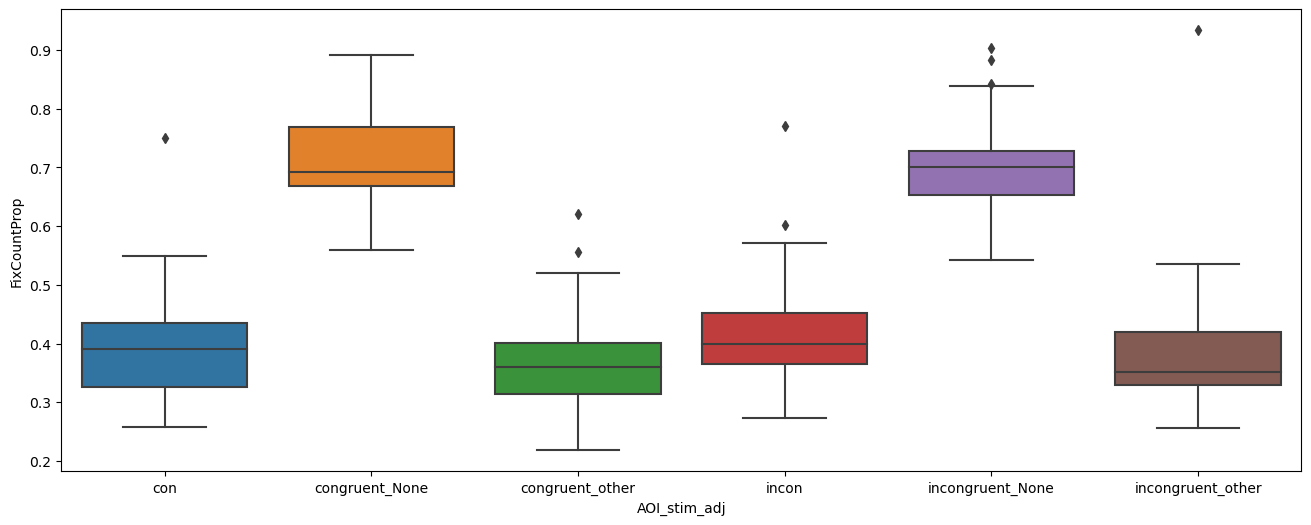

In [220]:
# group data
fixCount = df.groupby(['pp_id', 'trialNr', 'AOI_stim_adj']).FixDur.count()
fixCount_df = fixCount.reset_index()
fixCount_df = fixCount_df.rename(columns={'FixDur': 'FixCount'})


# Calculate 'FixCountProp'
fixCount_df['FixCountProp'] = fixCount_df.groupby(['pp_id', 'trialNr'])['FixCount'].transform(lambda x: x / x.sum())

a = fixCount_df.groupby(['pp_id', 'AOI_stim_adj']).FixCountProp.mean().reset_index() # average across trials for each participant for each AOI

# Calculate mean and standard error of the mean (SEM)
stats = a.groupby('AOI_stim_adj').agg(
    mean=('FixCountProp', 'mean'),
    ci_95=('FixCountProp', lambda x: 1.96 * np.std(x, ddof=1) / np.sqrt(len(x)))
)

# Extracting values for plotting
categories = stats.index.tolist()
means = stats['mean'].tolist()
errors = stats['ci_95'].tolist()

# Creating the bar graph with error bars
plt.figure(figsize=(12, 4))
plt.bar(categories, means, color='skyblue', yerr=errors, capsize=5)

# Adding titles and labels
plt.title('How many fixations are on each AOI fixated on average? [+95%CI]')
plt.xlabel('Image')
plt.ylabel('Proportion Fixations')

# Show the plot
plt.show()

# Some stats
con = a[a.AOI_stim_adj == 'con'].FixCountProp
incon = a[a.AOI_stim_adj == 'incon'].FixCountProp
con_other = a[a.AOI_stim_adj == 'congruent_other'].FixCountProp
incon_other = a[a.AOI_stim_adj == 'incongruent_other'].FixCountProp

# T-test for con vs incon
t_stat, p_value = ttest_rel(con, incon)
print(f"T-statistic FixProp Con vs Incon: {t_stat}, P-value: {p_value}")

# T-test for con_other  vs incon_other
t_stat, p_value = ttest_rel(con_other, incon_other)
print(f"T-statistic FixProp Con_other vs Incon_other: {t_stat}, P-value: {p_value}")

# T-test for con vs con_other
t_stat, p_value = ttest_rel(con, con_other)
print(f"T-statistic FixProp Con vs Con_other: {t_stat}, P-value: {p_value}")

# T-test for incon vs incon_other
t_stat, p_value = ttest_rel(incon, incon_other)
print(f"T-statistic FixProp Incon vs Incon_other: {t_stat}, P-value: {p_value}")

print(stats)

# Create the box plot
plt.figure(figsize=(16, 6))
sns.boxplot(x='AOI_stim_adj', y='FixCountProp', data=a)


### Analyzing Response Data (accuracy, response time)

#### Load and filter the data

In [221]:
path_resp = os.path.join(path, 'allSubjects_Spaak_resp.csv')
resp_df = pd.read_csv(path_resp)

resp_df['pp_id'] = resp_df['fName'].str.split('.').str[0].str.rsplit('_', 1).str[0]

# filter out excluded participants if needed
resp_df = resp_df[~resp_df['pp_id'].isin(['2024_06_14_09_03_43', '2024_06_14_11_03_20'])]

# filter out columns 
resp_df = resp_df[['pp_id', 'trialNr', 'condition', 'respKey', 'respTime', 'sceneName', 'probeCorr', 'probeIncorr', 'showProbeKey', 'corrProbeSide', 'event']]

# drop duplicates
resp_df = resp_df.drop_duplicates(subset=['pp_id', 'trialNr', 'event'])
# save the data
resp_df.to_csv(os.path.join(path, 'allSubjects_Spaak_resp2.csv'), index=False)

# add a column coding response accuracy
resp_df['respCorr'] = np.where(resp_df['respKey'] == 'arrow' + resp_df['corrProbeSide'], 1, 0)  

C:\Users\Artem\AppData\Local\Temp\ipykernel_21672\4289041695.py:4: FutureWarning: In a future version of pandas all arguments of StringMethods.rsplit except for the argument 'pat' will be keyword-only.
  resp_df['pp_id'] = resp_df['fName'].str.split('.').str[0].str.rsplit('_', 1).str[0]


#### Analize Response Times

RT means

condition    showProbeKey
pp_id                                inf
congruent    0.0             1209.601206
             1.0             1065.450183
incongruent  0.0             1181.993411
             1.0             1089.249104
dtype: float64

RT counts

condition    showProbeKey
congruent    0.0              8.677419
             1.0              9.129032
incongruent  0.0              8.870968
             1.0             10.064516
Name: respTime, dtype: float64


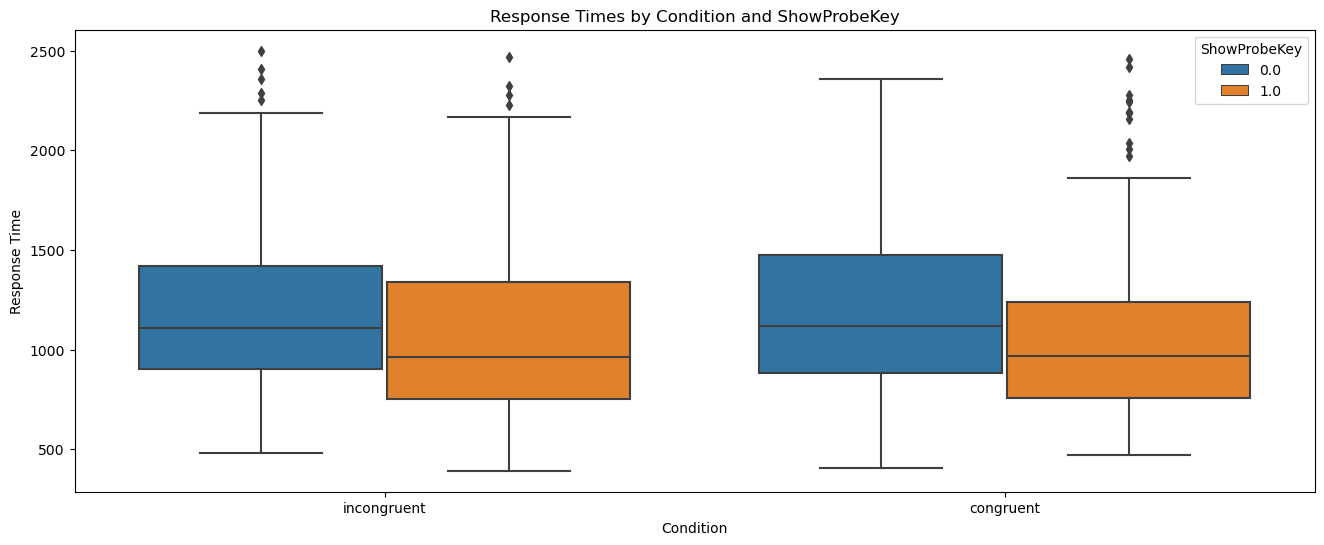

In [222]:
rt_df = resp_df.dropna(subset=['respTime'])
rt_df = rt_df[rt_df.respCorr == 1]

rt_df_counts = rt_df.groupby(['pp_id', 'condition', 'showProbeKey']).respTime.count().reset_index()
rt_df_means = rt_df.groupby(['pp_id', 'condition', 'showProbeKey']).respTime.mean().reset_index()

rt_tab = pd.pivot_table(rt_df_means, values='respTime', index=['pp_id'], columns=['condition', 'showProbeKey']).reset_index()

print('RT means\n')
print(rt_tab.mean())
print ('\nRT counts\n')
print(rt_df_counts.groupby(['condition', 'showProbeKey']).respTime.mean())


# Create the box plot
plt.figure(figsize=(16, 6))
sns.boxplot(x='condition', y='respTime', hue='showProbeKey', data=rt_df)

# Adding titles and labels
plt.title('Response Times by Condition and ShowProbeKey')
plt.xlabel('Condition')
plt.ylabel('Response Time')
plt.legend(title='ShowProbeKey')

# Show the plot
plt.show()

In [223]:
# Extract the relevant columns for the t-test
con_rt = rt_tab[('congruent', 1)]
incon_rt = rt_tab[('incongruent', 1)]
con_other_rt = rt_tab[('congruent', 0)]
incon_other_rt = rt_tab[('incongruent', 0)]

# Perform the paired t-test for Probe Key
t_stat, p_value = ttest_rel(con_rt, incon_rt)
print(f"T-statistic ProbeKey: {t_stat}, P-value: {p_value}")

# Perform the paired t-test for Other Key
t_stat, p_value = ttest_rel(con_other_rt, incon_other_rt)
print(f"T-statistic OtherKey: {t_stat}, P-value: {p_value}")

# Perform the paired t-test for Probe Key vs Other Key for congruent
t_stat, p_value = ttest_rel(con_rt, con_other_rt)
print(f"T-statistic Congruent Probe vs Other: {t_stat}, P-value: {p_value}")

# Perform the paired t-test for Probe Key vs Other Key for incongruent
t_stat, p_value = ttest_rel(incon_rt, incon_other_rt)
print(f"T-statistic Incongruent Probe vs Other: {t_stat}, P-value: {p_value}")




T-statistic ProbeKey: -0.7740872929415725, P-value: 0.4449370521927265
T-statistic OtherKey: 0.8335547070593794, P-value: 0.4111197936439587
T-statistic Congruent Probe vs Other: -3.3689291599447375, P-value: 0.0020871960179077837
T-statistic Incongruent Probe vs Other: -3.5767670486229592, P-value: 0.0012037004189063207


### Analize Response Accuracy

condition    showProbeKey
pp_id                             inf
congruent    0.0             0.630102
             1.0             0.616015
incongruent  0.0             0.632536
             1.0             0.680369
dtype: float64


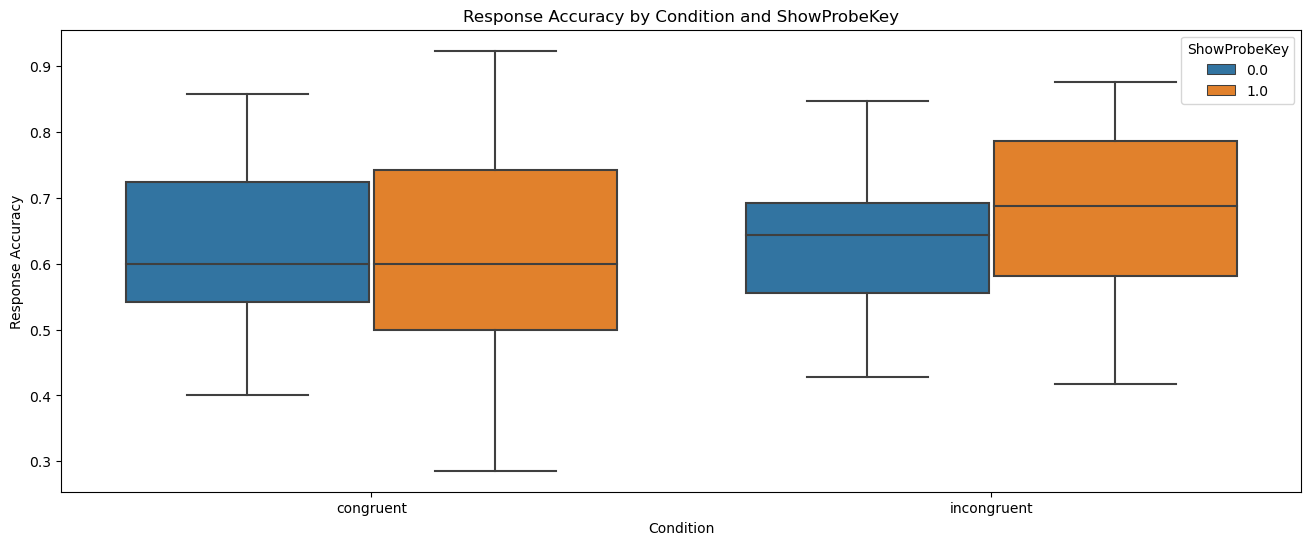

In [224]:
acc_df = resp_df.dropna(subset=['respKey'])
acc_df = acc_df.groupby(['pp_id', 'condition', 'showProbeKey']).respCorr.mean().reset_index()
acc_tab = pd.pivot_table(acc_df, values='respCorr', index=['pp_id'], columns=['condition', 'showProbeKey']).reset_index()
print(acc_tab.mean())

# Create the box plot
plt.figure(figsize=(16, 6))
sns.boxplot(x='condition', y='respCorr', hue='showProbeKey', data=acc_df)

# Adding titles and labels
plt.title('Response Accuracy by Condition and ShowProbeKey')
plt.xlabel('Condition')
plt.ylabel('Response Accuracy')
plt.legend(title='ShowProbeKey')

# Show the plot
plt.show()

In [225]:
# Extract the relevant columns for the t-test
con_acc = acc_tab[('congruent', 1)]
incon_acc = acc_tab[('incongruent', 1)]
con_other_acc = acc_tab[('congruent', 0)]
incon_other_acc = acc_tab[('incongruent', 0)]

# Perform the paired t-test for Probe Key
t_stat, p_value = ttest_rel(con_acc, incon_acc)
print(f"T-statistic ProbeKey: {t_stat}, P-value: {p_value}")

# Perform the paired t-test for Other Key
t_stat, p_value = ttest_rel(con_other_acc, incon_other_acc)
print(f"T-statistic OtherKey: {t_stat}, P-value: {p_value}")

# Perform the paired t-test for Probe Key vs Other Key for congruent
t_stat, p_value = ttest_rel(con_acc, con_other_acc)
print(f"T-statistic Congruent Probe vs Other: {t_stat}, P-value: {p_value}")

# Perform the paired t-test for Probe Key vs Other Key for incongruent
t_stat, p_value = ttest_rel(incon_acc, incon_other_acc)
print(f"T-statistic Incongruent Probe vs Other: {t_stat}, P-value: {p_value}")

T-statistic ProbeKey: -1.8306923876864867, P-value: 0.07709675477369571
T-statistic OtherKey: -0.08036399375521455, P-value: 0.9364814884686188
T-statistic Congruent Probe vs Other: -0.36847533249149184, P-value: 0.7151063691032923
T-statistic Incongruent Probe vs Other: 1.4729585945486807, P-value: 0.1511775639535282
